In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pylab as plt

from pyinverse.phantom import Phantom
#from pyinverse.grid import RegularAxis, FFTRegularAxis, RFFTRegularAxis, RegularGrid
from pyinverse.axis import RegularGrid, RegularAxis

In [3]:
p = Phantom()

In [4]:
na = 100
thetas_deg = RegularAxis.linspace(0, 180, na, endpoint=False)

nt = 100
t_axis = RegularAxis.linspace(-1, 1, nt)

grid = RegularGrid(thetas_deg, t_axis)

In [5]:
S = p.sinogram(grid)
S_rect = p.sinogram(grid, rect=True)

In [6]:
fig, ax = plt.subplots()
im = grid.imshow(ax, S, aspect='auto')
fig.colorbar(im);

<IPython.core.display.Javascript object>

In [7]:
fig, ax = plt.subplots()
im = grid.imshow(ax, S_rect, aspect='auto')
fig.colorbar(im);

<IPython.core.display.Javascript object>

In [8]:
S_Omega_grid, S_Omega = grid.spectrum(S, axis=0)

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = S_Omega_grid.imshow(ax[0], np.abs(S_Omega), aspect='auto')
fig.colorbar(im, ax=ax[0])
im = S_Omega_grid.imshow(ax[1], np.angle(S_Omega), aspect='auto')
fig.colorbar(im, ax=ax[1]);

<IPython.core.display.Javascript object>

In [10]:
S_Omega_rect_grid, S_Omega_rect = grid.spectrum(S_rect, axis=0)

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = S_Omega_rect_grid.imshow(ax[0], np.abs(S_Omega_rect), aspect='auto')
fig.colorbar(im, ax=ax[0])
im = S_Omega_rect_grid.imshow(ax[1], np.angle(S_Omega_rect), aspect='auto')
fig.colorbar(im, ax=ax[1]);

<IPython.core.display.Javascript object>

In [12]:
S_Omega_theory = p.proj_ft(S_Omega_grid.to_Hz(axis=0))

RegularAxis(x0=0, T=1.8, N=100)
1.8


In [13]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = S_Omega_grid.imshow(ax[0], np.abs(S_Omega_theory), aspect='auto')
fig.colorbar(im, ax=ax[0])
im = S_Omega_grid.imshow(ax[1], np.angle(S_Omega_theory), aspect='auto')
fig.colorbar(im, ax=ax[1]);

<IPython.core.display.Javascript object>

In [14]:
S_Omega_grid.axis_y._axis_t_N

100

In [15]:
S_Omega_grid.axis_y.scale(2)._axis_t_T is None

False

In [16]:
S_Omega_rect_theory = p.proj_ft(S_Omega_grid.to_Hz(axis=0), rect=True)

RegularAxis(x0=0, T=1.8, N=100)
1.8


<IPython.core.display.Javascript object>


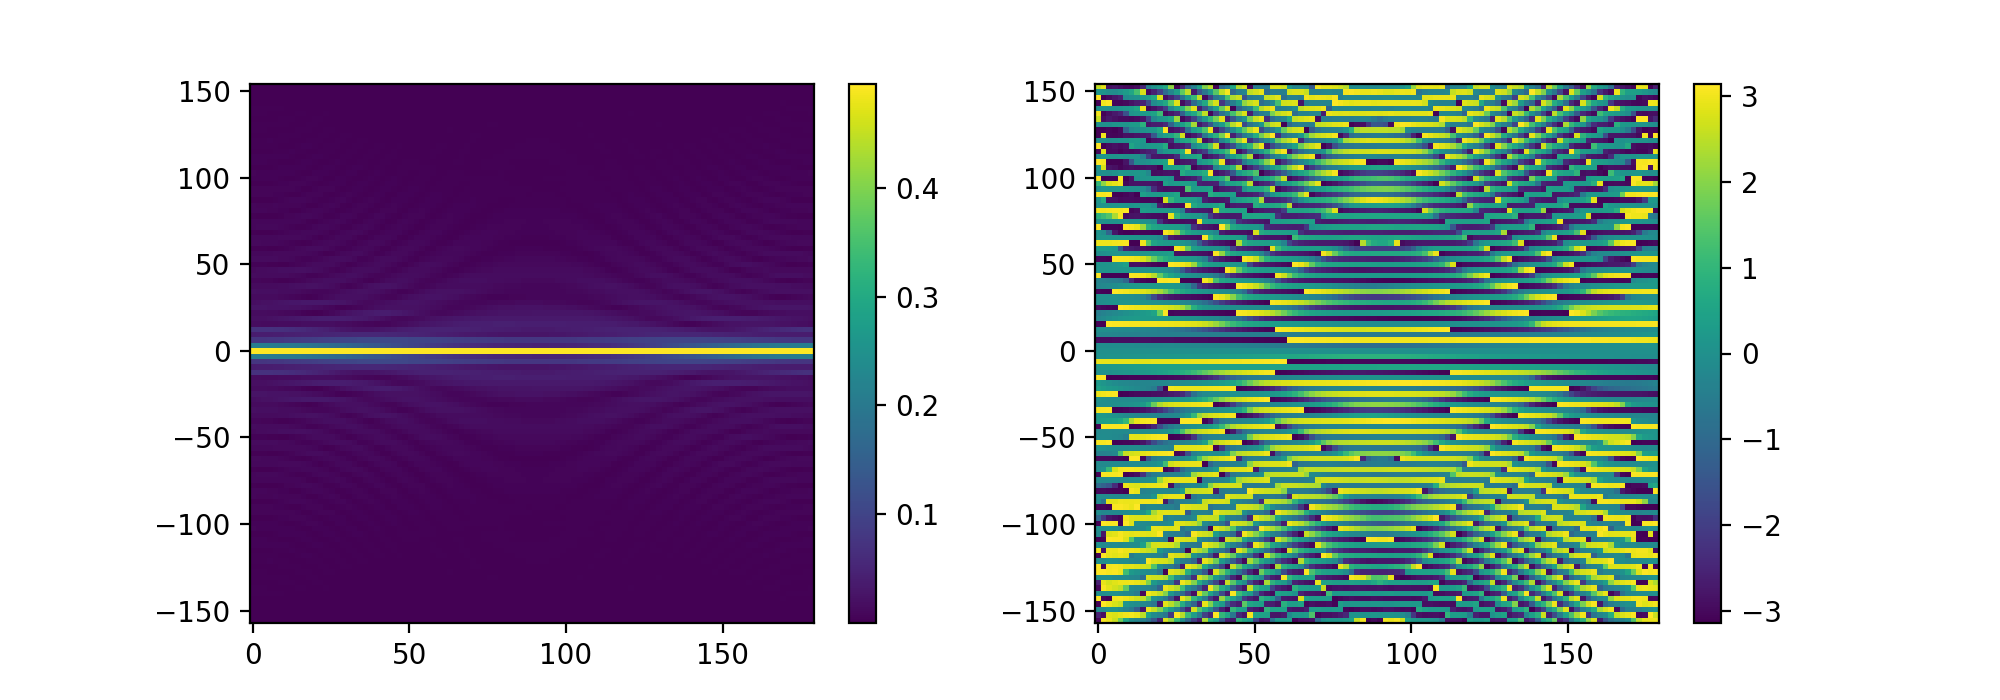

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = S_Omega_grid.imshow(ax[0], np.abs(S_Omega_rect_theory), aspect='auto')
fig.colorbar(im, ax=ax[0])
im = S_Omega_grid.imshow(ax[1], np.angle(S_Omega_rect_theory), aspect='auto')
fig.colorbar(im, ax=ax[1]);

In [20]:
D = S_Omega_theory - S_Omega_rect_theory

<IPython.core.display.Javascript object>


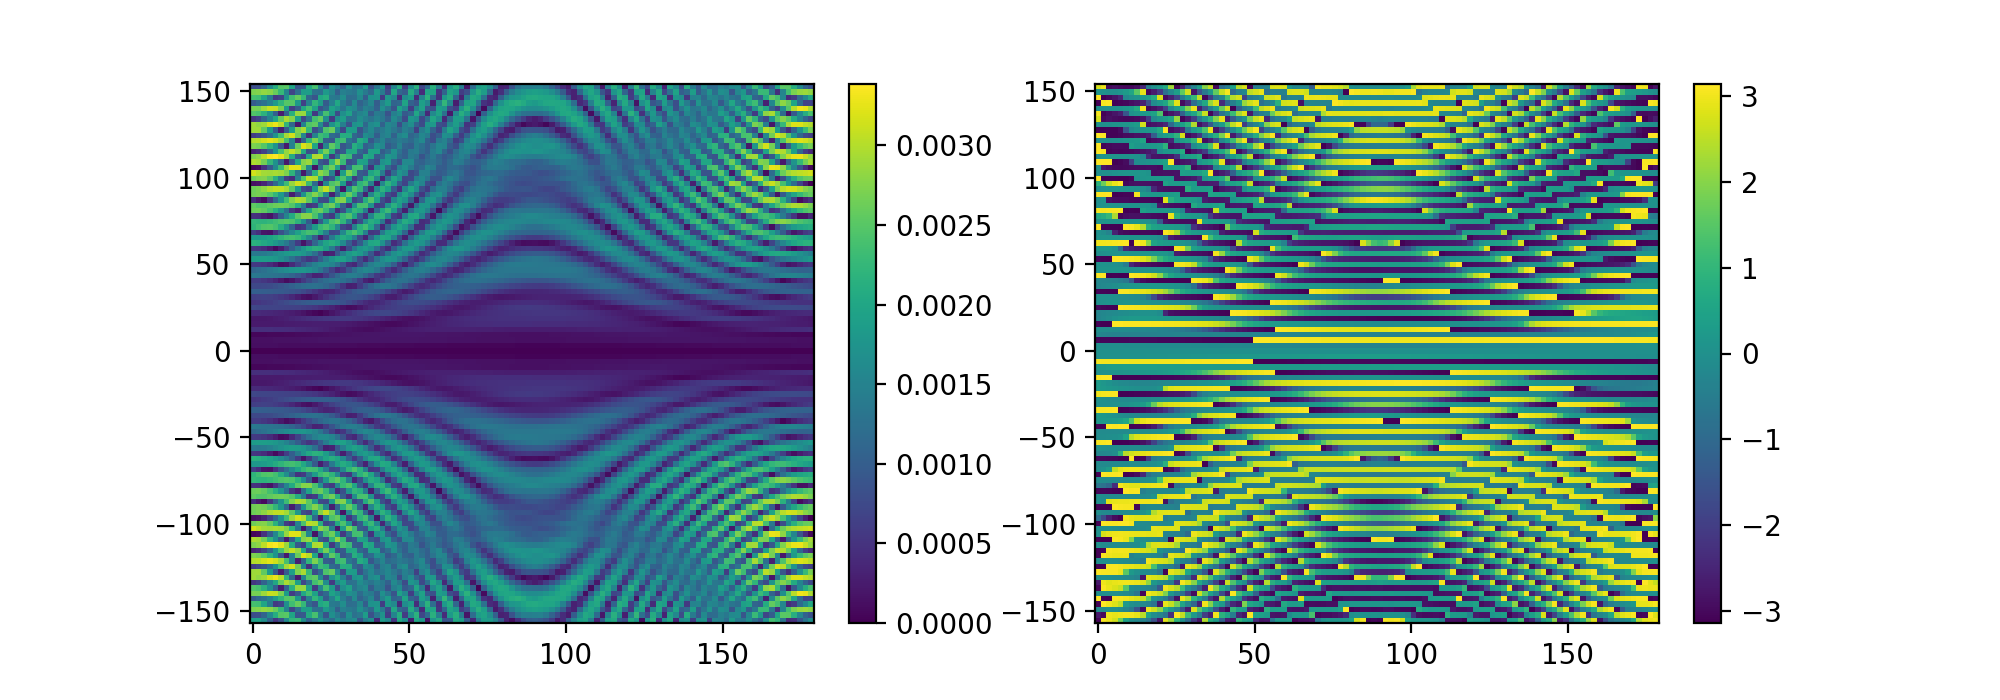

In [21]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = S_Omega_grid.imshow(ax[0], np.abs(D), aspect='auto')
fig.colorbar(im, ax=ax[0])
im = S_Omega_grid.imshow(ax[1], np.angle(D), aspect='auto')
fig.colorbar(im, ax=ax[1]);